# Derivas de concepto en la cadena de bloques. Método ADWIN

Detección de derivas de concepto en el tamaño de bloque de la cadena de bloques, a partir del método matemático ADWIN, con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 836000 # Inicio: 0 
end = 836999 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el tamaño de bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, color="navy", label="tamaño de bloque")
    ax.set_ylim(bottom=0)
    ax.set_title("Tamaño de bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Megabytes")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# ADWIN Valores por defecto:
# https://riverml.xyz/dev/api/drift/ADWIN/
# delta=0.002         -> Valor de significancia 
# clock=32            -> Frecuencia con la que se comprueban cambios. 1 => con cada nuevo dato
# max_buckets=5       -> Cantidad máxima de contenedores de datos de cada tamaño que se debe mantener, como paso previo a ser fusionados
# min_window_length=5 -> Longitud mínima que debe tener una subventana para ser evaluada 
# grace_period=10     -> Cantidad mínima de datos exigida para realizar la detección de cambios

drift_detector = drift.ADWIN(delta=0.2, clock=1)

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Tamaño de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["size"])  # Tamaño de bloque

    drift_detector.update(block["size"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["size"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

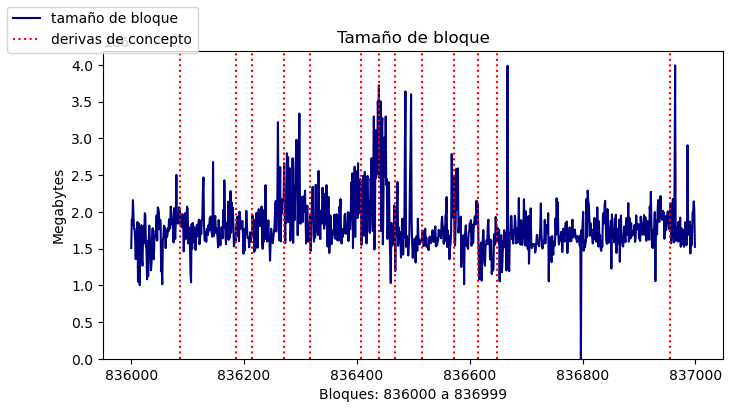

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, tamaño de bloque y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} bytes - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 836086: 2028406 bytes - 24/03/2024 12:20:30
Bloque 836186: 1812543 bytes - 25/03/2024 03:29:03
Bloque 836214: 1674987 bytes - 25/03/2024 08:52:01
Bloque 836270: 2121155 bytes - 25/03/2024 19:57:17
Bloque 836316: 1727738 bytes - 26/03/2024 02:54:09
Bloque 836407: 2230161 bytes - 26/03/2024 19:38:15
Bloque 836440: 2462841 bytes - 27/03/2024 00:51:10
Bloque 836468: 1192021 bytes - 27/03/2024 05:02:34
Bloque 836516: 1747257 bytes - 27/03/2024 13:40:21
Bloque 836572: 2480851 bytes - 28/03/2024 00:02:08
Bloque 836614: 2114034 bytes - 28/03/2024 07:05:21
Bloque 836649: 1784072 bytes - 28/03/2024 12:19:29
Bloque 836955: 1859566 bytes - 30/03/2024 12:35:09
